# Cryptocurrency data analysis and price prediction using ARIMA model
#### Project Proposal

## 1. Aims, objective and background
### 1.1 Introduction
Cryptocurrencies are quickly challenging traditional currencies throughout the world. Digital currencies may be purchased in a variety of ways, making them accessible to everyone, and merchants adopting multiple cryptocurrencies could signal that money as we know it is about to undergo a huge transformation.

Bitcoin was the first cryptocurrency launched in the year 2009 and since then the popularity and acceptability of blockchain and cryptocurrencies has only grown upward direction. Due to its unique qualities of blockchain, such as security and transparency, cheaper cost and decentralisation, it is already being used to solve variety of real world problems as per Mallqui and Fernandes [1].

This project was inspired by Chaudhari, A. (2020, June 11). Forecasting Cryptocurrency Prices using Machine Learning [2] and Chakrabarti, S. (2021, December 3). Cryptocurrency Price Prediction using ARIMA Model [3]. The authors used data science ARIMA, LSTM and Prophet models to predict the cryptocurrency prices.

Currently, the interest of investing in crypto is growing rapidly and there is less information about crypto relative to our traditional trading and this is a new platform for me researching. I love to research new things. So, I have decided to focus on next few months price prediction of top 4 cryptocurrencies.

### 1.2 Aims and objectives
For this project I would like to explore following things
1. Analysing of history data of cryptocurrency.
2. Using history data making visualizations (graphs)
3. Looking for relationship of the graphs.
4. Checking the instantaneous move of one coin (BTC) affect others.
5. Using ARIMA (Autoregressive integrated moving average) model for predicting next 6 months prices.

For this project my aims are
1. Decide how much history data is required to use ARIMA models.
2. Decide which currencies will be best for my project.
3. Collecting data via API/webscraping and storing in better format so that I can do data cleaning.
4. Clean the scraped or API history data suitable for data analysis
5. Perform some data analysis to see if there are any trends in the data that may be helpful for future investigation.
6. Calculate the accuracy of price predication.

### 1.3 Data
#### 1.3.1 Data requirement
Right now there are more than 6000 crypto coins in the market. Taking consideration of time and resource. I have chosen to work on top 4 crypto coins to explore.
I have decided to have equal number of history data for the coins and going to use data from one website because there are a lot of exchanges and each exchange have slight differences.

#### 1.3.2 Choice of history data website
For the history data of coins, I am going to choose 1 website, but first I made a list of good sources.

1. www.investing.com        Scrapping / No API
2. www.coinmarketcap.com    No Scrapping / API
3. www.coingecko.com        No Scrapping / API
4. www.coinpaprika.com      No Scrapping / API

In this list only www.investing.com allowed data scrapping and other websites allowed on APIs only. API will be easy to collect data, but then I will not able to use my new ability to scrap data. So, I am choosing www.investing.com [4].

#### 1.3.3 Choice of the cryptocurrencies: methodology
First point for choosing the currency will be the enough history data for analysis. Keeping the coin not related to each other. After it, we need to check their rank [5] and daily volume.

Following are the selected coins:
1. Bitcoin (BTC)
2. Ethereum (ETH)
3. Cardano (ADA)
4. XRP (XRP)

Originally I have chosen top 4 currencies but some don't have enough history for analysis and some are related to other currencies. They may have affected each other with the price change. So, I have skipped Binance Coin (BNB) and Solana (SOL).

#### 1.3.4 Limitations and constraints of the data
In this project I am going to use last 3 years and 1 month of history data with per day value for analysis. This means I'm not going to use data from when the coin initiated in the market and this data not going to be per second/minute it will be per day.

For analysing large data (per second or per minutes) will cause lot longer time for scrapping, cleaning and analysing the data. So, taking the account of limited time and resources I am going to use per day history values.

Everyone knows there are different event happened, and it may have caused the price fluctuations, for example last few days everyone knows COVID caused a lot of sudden fall in all the markets.

### 1.4 Ethical considerations
#### 1.4.1 Use of cryptocurrency history data
www.investing.com allows to use their data but only ask to make sure to include full disclosure to Investing.com brand, logo, watermark and links if possible [4].

I have also taken their individual permission for scraping the data. Following are the few lines of their answer

"Investing.com is an online data and news website that provides financial information.
Our services are provided for free and you are welcome to use the information and tools we provide, just please make sure to include full disclosure to Investing.com brand, logo, watermark, and links if possible."

#### 1.4.2 Onward use / reusage and derived data
Anyone wishing to use the source data must follow the term and conditions of www.investing.com and should take individual permission if necessary. The same term and condition apply to data produced from source data.

Analysis and conclusions are my own.

#### 1.4.3 Potential impacts of using cryptocurrency data for the proposes analyses
Doing analysis of the source data may cause negative effect on the traders/cryptocurrencies. This may be cause potential losses.
1. Rather than making judgments on the currency will grow or fall. This project only focus on analysing objective.
2. The project's findings will not claim to be a fully representative analysis. Limitations of data are outlined above. Limitations of techniques will be discussed further project.



In [582]:
# Importing libraries and modules
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import mplfinance as mpf

import scipy as scipy
import seaborn as sns

from datetime import datetime
from datetime import date
from datetime import timedelta

# Statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
from itertools import product

# Show all matplotlib graphs inline
%matplotlib inline

# Set all graphs to a seaborn style with a grey background grid which makes reading graphs easier
sns.set()

## 2. Web Scraping cryptocurrencies history data
### 2.1 Defining scraping and extraction functions
There going to be 3 years data for each coin.

1. Bitcoin (BTC)
2. Ethereum (ETH)
3. Cardano (ADA)
4. XRP (XRP)

**Source:** *https://in.investing.com/*
<img src="https://i-invdn-com.investing.com/redesign/images/investing-logo.svg" width="210" alt="investing.com">

Before importing the data we need to make a function to iterate over the 4 urls.
All the data of each coin is going to be on 1 page so, data scraping will take few seconds. So, we don't need to worry about getting blocked or blacklisted.

Below function will check if the website is accessible and returns the content.

In [583]:
today = date.today()
today = date.strftime(today, '%d/%m/%Y')

# coinInfo dataframe includes required values to scrap data from Investing.com
coinInfo = { 'bitcoin': {'name': 'bitcoin', 'symbol': 'BTC', 'curr_id': 1057391, 'smlID': 25609848},
            'ethereum': {'name': 'ethereum', 'symbol': 'ETH', 'curr_id': 1061443, 'smlID': 25674078},
            'cardano': {'name': 'cardano', 'symbol': 'ADA', 'curr_id': 1062537, 'smlID': 25948924},
            'xrp': {'name': 'xrp', 'symbol': 'XRP', 'curr_id': 1057392, 'smlID': 25674343},}

# getParsedWebPage function will scrap data from Investing.com and convert it to dataframe
# Date format should in 'DD/MM/YYYY"
# All the prices are in US dollar

def getParsedWebPage(coinName, from_date, to_date):

    headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36", "X-Requested-With": "XMLHttpRequest"}

    url = "https://in.investing.com/instruments/HistoricalDataAjax"
    header = 'null'

    payload = {'header': header,
               'st_date': from_date, 'end_date': to_date,
               'sort_col': 'date', 'action': 'historical_data',
               'smlID': coinInfo[coinName], 'sort_ord': 'DESC', 'interval_sec': 'Daily', 'curr_id': coinInfo[coinName]['curr_id']}

    res = requests.post(url, headers=headers, data=payload)

    # Check that page is accessible for scraping
    if res.status_code != 200:
        soup = 'error'
    else:
        soup = BeautifulSoup(res.content, "lxml")
        table = soup.find('table', id="curr_table")
        df = pd.read_html(str(table))[0]

    # Adding Coin symbol and rearranging the columns
    df['Symbol'] = coinInfo[coinName]['symbol']
    df.rename(columns={'Vol.': 'Volume'}, inplace=True)
    df = df[['Date', 'Symbol', 'Price', 'Open', 'High', 'Low', 'Volume']]
    return df

### 2.1 Scraping the data
We are going to scrap last 3 years and 1 month data using function getParsedWebPage and appending all coins data in one dataframe. I am going to use from_date 365*3 + 30 = 1125 days before yesterday and to_date going to be yesterday because today's market may be not closed yet.

In [584]:
# Date format should in 'DD/MM/YYYY"
# from_date = '21/12/2018'
# to_date = '21/12/2021'

today = date.today()

yesterday = date.today() - timedelta (days = 1)

to_date = yesterday
from_date = yesterday - timedelta (days = 1095+60)

# Modifying the date format
from_date = date.strftime(from_date, '%d/%m/%Y')
to_date = date.strftime(yesterday, '%d/%m/%Y')

coinsHistoryDF = pd.DataFrame()

# Scraping and appending the coin data in one DataFrame
for coin in coinInfo:
    coinData = getParsedWebPage(coin, from_date, to_date)
    coinsHistoryDF = coinsHistoryDF.append(coinData, ignore_index=True)

### 2.2 Check Scraped data
We need to ensure that was scraped correctly and it does not go outside the required bounds.

We're going to check the row count, ensure that it contains all the scraped coins and all values are not null.

In [585]:
uniqueCoins = coinsHistoryDF.Symbol.unique()

print(coinsHistoryDF.info())

print("\nUnique coin symbols")
print(uniqueCoins)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4624 non-null   object 
 1   Symbol  4624 non-null   object 
 2   Price   4624 non-null   float64
 3   Open    4624 non-null   float64
 4   High    4624 non-null   float64
 5   Low     4624 non-null   float64
 6   Volume  4624 non-null   object 
dtypes: float64(4), object(3)
memory usage: 253.0+ KB
None

Unique coin symbols
['BTC' 'ETH' 'ADA' 'XRP']


### 2.3 Import previously scraped data
Because the history data of cryptocurrencies are being stored for long term and the content is not modified except in unavoidable circumstances, there is danger of altering the history data of the coins is very low but there is still change of modifications will occur on following

1. Changes in Website content, design, AJAX calls
2. History data may get removed
3. Some reason if coin get banned and government may ask to remove all its content
4. The website where we are scrapping it may go down due to some bugs

If we keep our previously scraped data then such things will not happen and it will ensure of project consistent.

In [586]:
# Saving previously scraped data in a csv file
# All the prices are in US dollar

# coinsHistoryDF.to_csv('coinsHistory.csv')

In [587]:
# Read previously scraped data
coinsHistoryCSV = pd.read_csv('coinsHistory.csv', index_col=0, parse_dates=True)

In [588]:
# Previously scraped data should be the same as freshly scraped data
(coinsHistoryCSV == coinsHistoryDF).describe()

,Date,Symbol,Price,Open,High,Low,Volume
count,4624,4624,4624,4624,4624,4624,4624
unique,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True
freq,4624,4624,4624,4624,4624,4624,4624


## 3. Data cleaning
Data cleaning is only needed for 'Date' and 'Volume' column. Date strings need to converted in date format and for Volumne there is 'K', 'M' and 'B' at the end of the numbers. I will multiply the values with relative factor and remove the 'K', 'M' and 'B'.

In [589]:
# Converting date string to date format
coinsHistoryCSV['Date'] = pd.to_datetime(coinsHistoryCSV['Date'])

# Replacing the K M and B with 1000, 1000000 and 1000000000
def strToNum(strNum):
    num = 0
    num_map = {'K':1000, 'M':1000000, 'B':1000000000}
    if str(strNum).isdigit():
        num = int(strNum)
    else:
        if len(strNum) > 1:
            num = float(strNum[:-1]) * num_map.get(strNum[-1].upper(), 1)
    return int(num)

for index, row in enumerate(coinsHistoryCSV.iterrows()):
    row = strToNum(coinsHistoryCSV['Volume'][index])
    coinsHistoryCSV.iat[index, 6] = row

# Converting object data type to number or float and adding Volume in US $
coinsHistoryCSV['Volume'] = pd.to_numeric(coinsHistoryCSV['Volume'])
coinsHistoryCSV['Volume $'] = coinsHistoryCSV['Volume'] * coinsHistoryCSV['Price']

coinsHistoryCSV.sort_values(by='Date', inplace=True)

# Updating column 'Price' title to 'Close'
try:
    coinsHistoryCSV.rename(columns={'Price': 'Close'}, inplace=True)
except Exception:
    pass

## 4. Visual representation of data
Visual representation is a picture or detailed illustration, It is an accurate depiction of given numbers and their relationships.

### 4.1 Volume
Volume or trading volume, is a total number of a cryptocurrencies that was traded during a given period of time.
For this project time period is a day.

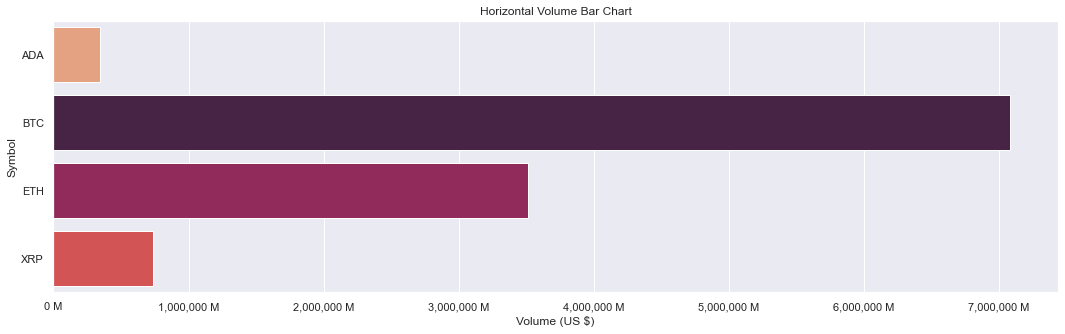

In [590]:
# Plotting volume graph for BTC, ETH, ADA and XRP cryptocurrencies

volumeSumDF = coinsHistoryCSV.groupby(['Symbol'])['Volume $'].sum().reset_index()
volumeRank = np.array( volumeSumDF['Volume $'].argsort())

fig, ax = plt.subplots(figsize=(18,5))

# Generating color palette
colorPalette = sns.color_palette("rocket", len(volumeSumDF))

# Using seaborn and matplotlib creating barplot chart info
g = sns.barplot( y = volumeSumDF['Symbol'], x = volumeSumDF['Volume $'], palette=np.array(colorPalette[::-1])[volumeRank], ci = None)

# Labels
plt.title("Horizontal Volume Bar Chart")
ax.set_xlabel('Volume (US $)')

label_format = '{:,.00f} M'

# fixing yticks with matplotlib.ticker "FixedLocator"
ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([label_format.format(x/1000000) for x in ticks_loc])

# Converting barplot chart info into a image
fig=plt.gcf()
plt.show()

### 4.2 Japanese candlestick charts
#### 4.2.1 What is Candlestick Chart?
Almost all the traders use Japanse candlestick graph for visualization of the chart. This type of chart is easy to read and understand.

#### 4.2.2 Components of a Candlestick
A candle stick provides wide range of information in a straightforward manner. A body and wicks make up each candlestick.


<img src="https://www.edelweiss.in/ewwebimages/WebImages/Learner/Canlde_Stick_Chart~3bb136c3-39a2-4a33-a850-95add37522c5.jpg" alt="Candle stick information image" width="400"/>

**Source:** *https://www.edelweiss.in/investology/technical-analysis-2c8d50/what-is-candle-stick-chart-in-stock-market-f4dcde* [6]

Note: Markdown syntax I can't add width or height values. After doing some research I found that I can use HTML syntax for it [7].

1. Green candlestick is formed if the close is above the open.
2. Red candle stick is formed if the close if below the open.
3. Space between the open and close points is depicted as the 'real body'.
4. The thin lines that extended from top and bottom are known as wicks or shadows.
5. The top of the upper wick represents 'high'.
6. The bottom of the lower wick represents 'low'.

Lets generate candle stick charts for our cryptocurrencies. The chart will be for last 365 days, more than 365 it will unreadable. The Chart will contain Candlesticks, SMA 20, SMA 50 and SMA 200. The SMA means (Simpel moving average)

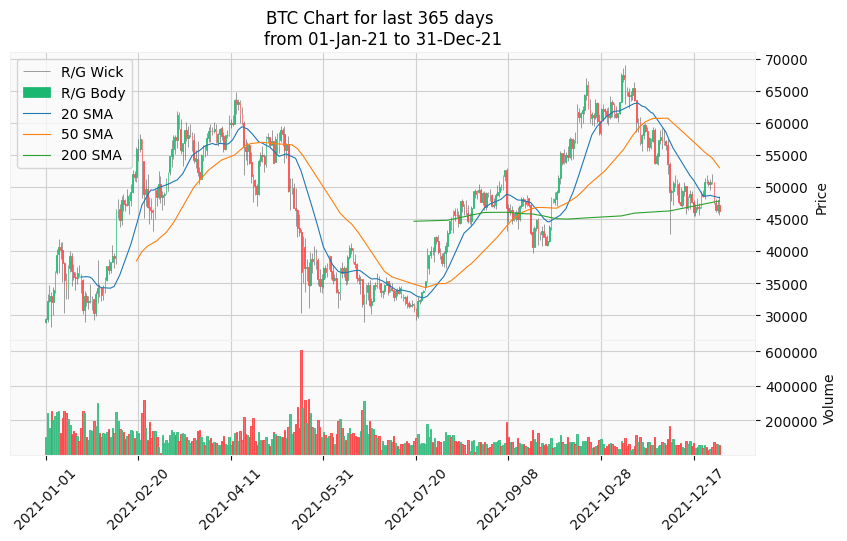

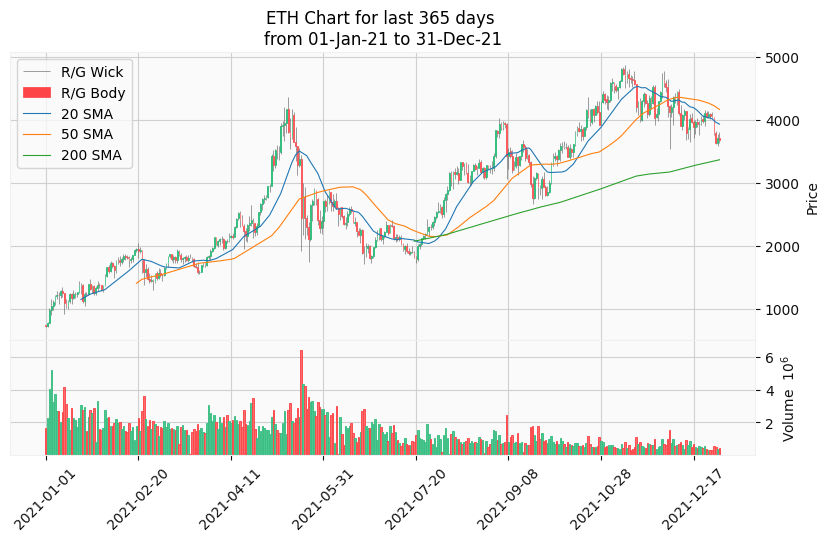

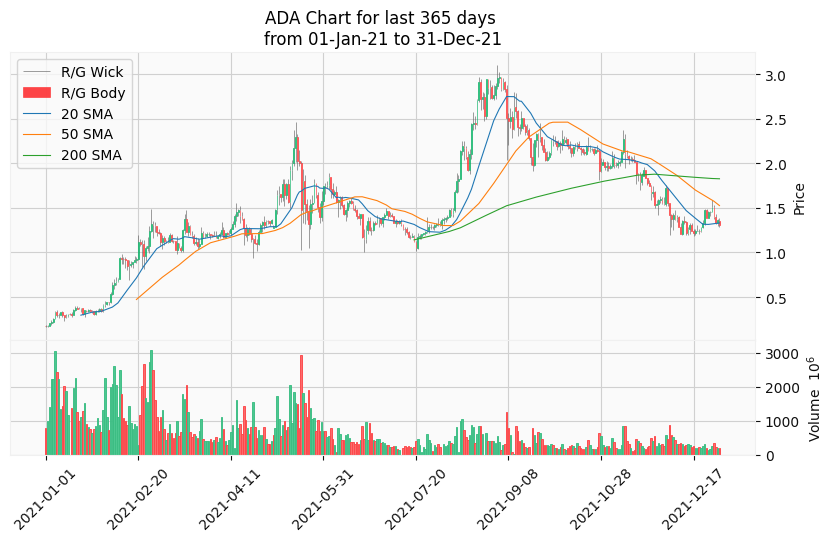

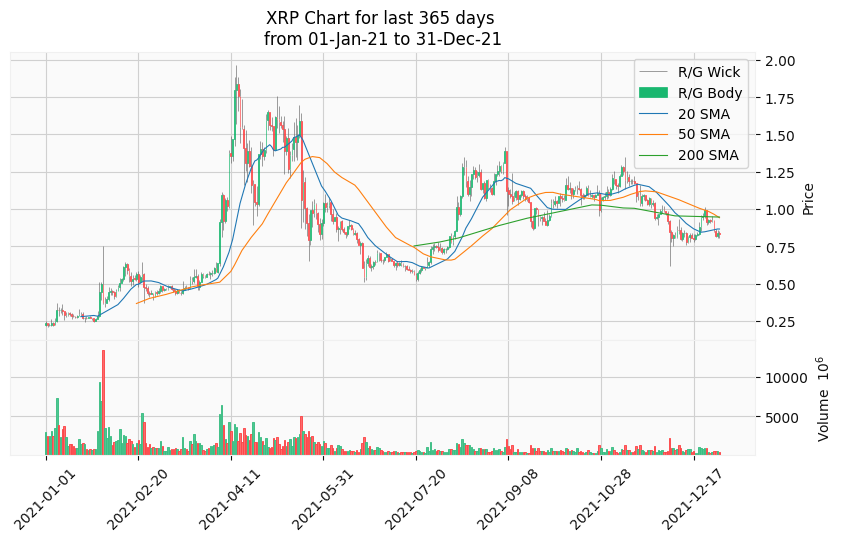

In [591]:
# Modifying data to create candlestick chart
coinsHistoryDateIndex = coinsHistoryCSV.copy()
coinsHistoryDateIndex.index = pd.DatetimeIndex(coinsHistoryDateIndex['Date'])
coinsHistoryDateIndex.drop(['Date'], axis = 1, inplace=True)

# function for generating candle stick chart with SMAs
def genCandleStickChart(symbol, lastDays):

    data = coinsHistoryDateIndex[(coinsHistoryDateIndex['Symbol'] == symbol)][-lastDays:]

    from_date = data.index[-lastDays].strftime("%d-%b-%y")
    to_date = data.index[-1].strftime("%d-%b-%y")
    title = symbol + ' Chart for last ' + str(lastDays) + ' days \nfrom '+ str(from_date) + ' to ' + str(to_date)

    fig, ax = mpf.plot(data, type='candle', style='yahoo',
                       volume=True, mav=(20,50, 200),
                       datetime_format='%Y-%m-%d', figratio=(18,10), returnfig=True)

    # Configure chart legend and title
    # R/G = Red/Green
    ax[0].legend(['R/G Wick', 'R/G Body', '20 SMA', '50 SMA', '200 SMA'])
    ax[0].set_title(title)

for symbol in uniqueCoins:
    genCandleStickChart(symbol, 365)

The SMA is calcuated by SMA = (A1 + A2 + A3 + An)/n [8].
Where, An = The prices of an asset at the periods n,
       n  = the number of periods.

There are three most popular SMAs i.e. 20 SMA, 50 SMA and 200 SMA. [9]
1. The 20 moving average (20 SMA) is the short-term outlook.
2. The 50 moving average (50 SMA) is the medium term outlook.
3. The 200 moving average (200 SMA) is the trend bias.

Following are the trend predictions strategies using SMAs
1. A good uptrend is predicted by Price above the 20 SMA, the 20 SMA above the 50 SMA and 50 SMA above the 200 SMA.
2. A good downtrend is predicted by Price below 20 SMA, the 20 SMA below the 50 SMA and 50 SMA below the 200 SMA.
3. When 20 SMA, 50 SMA and 200 SMA are not in alignment then it signifies that price is in consolidation or experiencing a pullback.

From the above charts we can see that for past few months
 1. BTC is poor but showing uptrend.
 2. ETH showing very good uptrend.
 3. ADA and XRP is in consolidated state.

## 5. Price prediction using ARIMA model
### 5.1 Stationarity check and STL-decomposition
The timeseries is called stationary if the mean, variance and covariance is constant over period of time. We need a stationary time series for ARIMA model, if is not stationary we need to make it stationary using differencing.

Dickey–Fuller test for BTC: p=0.994257
Dickey–Fuller test for ETH: p=0.979148
Dickey–Fuller test for ADA: p=0.831681
Dickey–Fuller test for XRP: p=0.555328


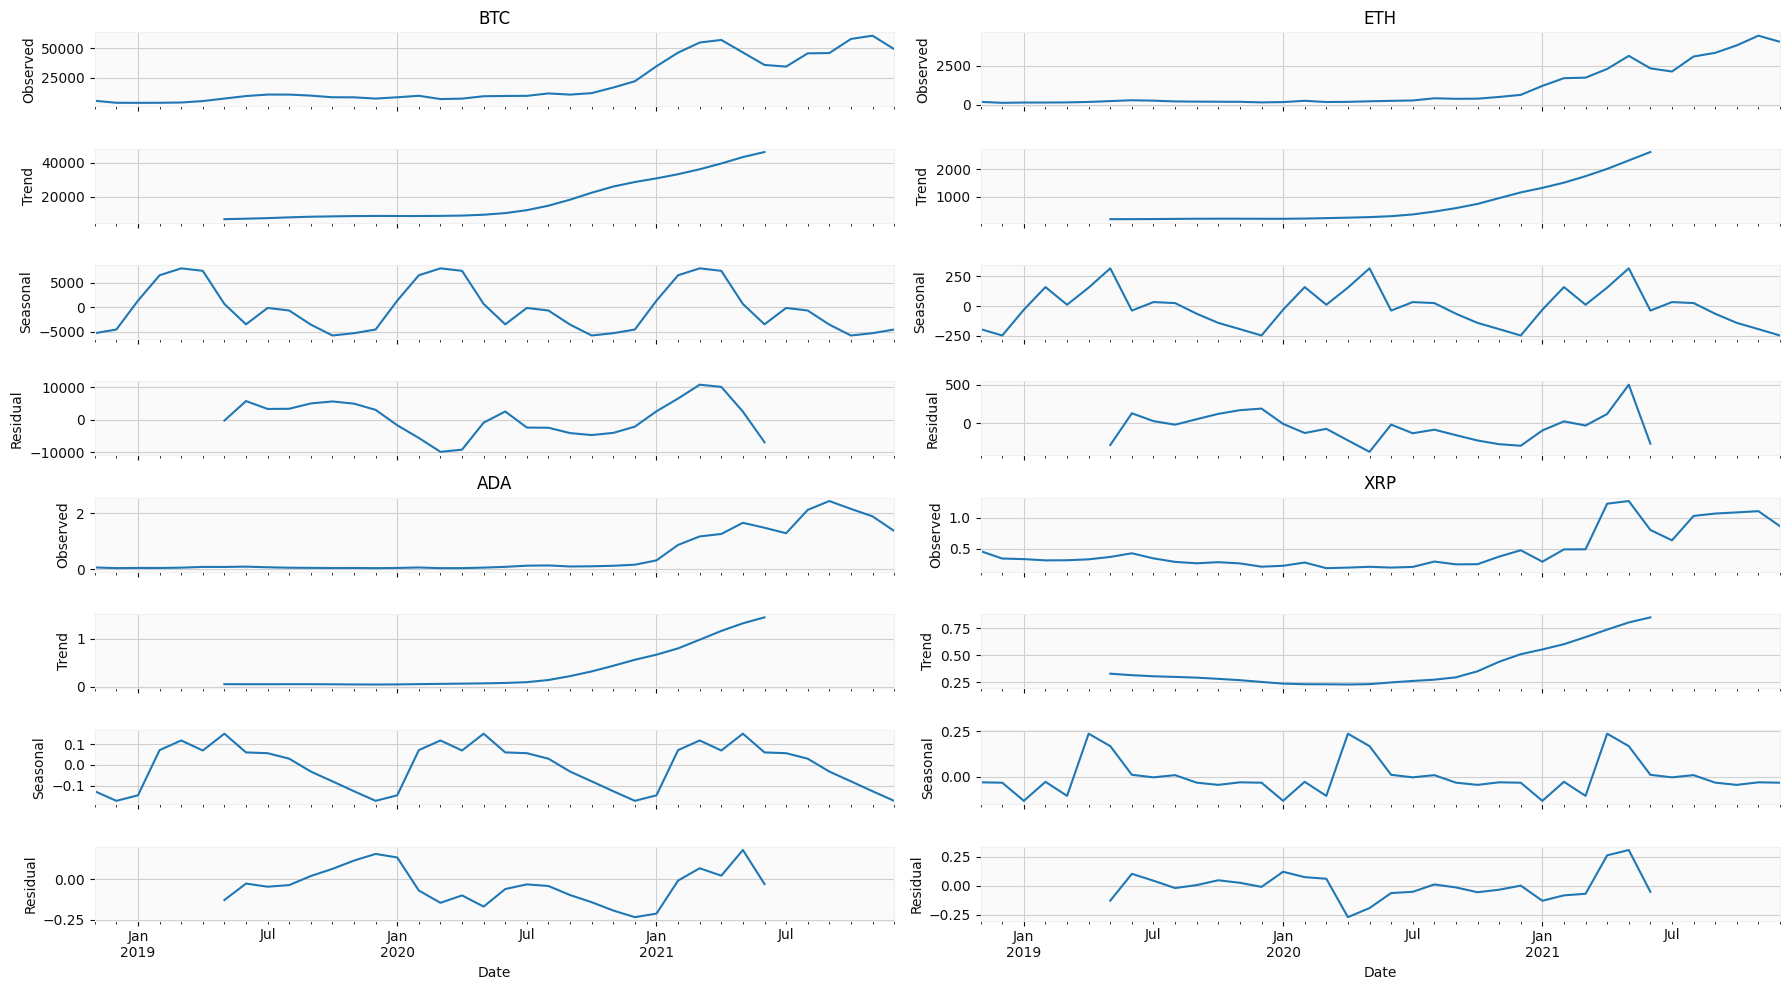

In [592]:
# Making a separate dataframes for each coin and putting them into dictCoinsHistory
dictCoinsHistory = {}
for symbol in uniqueCoins:
    dictCoinsHistory[symbol] = coinsHistoryDateIndex[(coinsHistoryDateIndex['Symbol'] == symbol)]

# Resampling the data to monthly frequency
monthMean = {}
for symbol in uniqueCoins:
    monthMean[symbol] = dictCoinsHistory[symbol].resample('M').mean()

# Seasonal decomposition
fig, axes = plt.subplots(ncols=2, nrows=8, sharex=True, figsize=(18,10))

# Function to plot graph
def plotseasonal(res, axes, coinName):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    axes[0].set_title(coinName)

for i, j, symbol in zip((1,1,2,2), (0,1,0,1), monthMean):
    print(('Dickey–Fuller test for ' + symbol + ': p=%f') % adfuller(monthMean[symbol].Close)[1])
    res = sm.tsa.seasonal_decompose(monthMean[symbol].Close, model='additive')
    plotseasonal(res, axes[(i-1)*4:(i)*4,j], symbol)

plt.tight_layout()
plt.show()

The Dickey–Fuller test gives us the p values. For seasonal chart we can see the pattern reapts itself for all coins and all coins show upward trend.

### 5.2 Box-Cox Transformations
A Box Cox transformation turns non-normal dependent variables into normal shapes. Many statistical approaches rely on the assumption of normality; if our data isn't normal, using a Box-Cox allows us to conduct a larger number of tests.

In [593]:
lmbda = {}
for symbol in monthMean:
    monthMean[symbol]['Box Cox'], lmbda[symbol] = scipy.stats.boxcox(monthMean[symbol].Close)
    print(('Dickey–Fuller test for ' + symbol + ': p=%f') % adfuller(monthMean[symbol]['Box Cox'])[1])

Dickey–Fuller test for BTC: p=0.794512
Dickey–Fuller test for ETH: p=0.932354
Dickey–Fuller test for ADA: p=0.910137
Dickey–Fuller test for XRP: p=0.528453


### 5.3 Differencing
Still, we can see the p values are very high. To supress the p more we can use seasonal differentiation and regular differentiation.
As we can see in the stationarity check chart there is seasonality oscillations.

#### 5.3.1 Seasonal differentiation
Seasonal differencing includes determining the difference between an observation and the matching observation from the prior year, is one way of differencing data.

In [594]:
print("Seasonal differentiation for 12 month")
# Seasonal differentiation (12 months)
for mean in monthMean:
    monthMean[mean]['Diff12'] = monthMean[mean]['Box Cox'] - monthMean[mean]['Box Cox'].shift(12)
    print(('Dickey–Fuller test for ' + mean + ': p=%f') % adfuller(monthMean[mean]['Diff12'][12:])[1])

# print("\nSeasonal differentiation for 3 month")
# # Seasonal differentiation (3 months)
# for mean in monthMean:
#     monthMean[mean]['Diff3'] = monthMean[mean]['Box Cox'] - monthMean[mean]['Box Cox'].shift(3)
#     print(('Dickey–Fuller test for ' + mean + ': p=%f') % adfuller(monthMean[mean]['Diff3'][3:])[1])

Seasonal differentiation for 12 month
Dickey–Fuller test for BTC: p=0.312089
Dickey–Fuller test for ETH: p=0.364404
Dickey–Fuller test for ADA: p=0.548914
Dickey–Fuller test for XRP: p=0.113184


Still, p-value indicate that series in not stationary.

#### 5.3.2 Second order differentiation
To obtain a stationary time series, it may be necessary to difference the data a second time, which is referred to as second order differencing.

Second Order differentiation for 2 month
Dickey–Fuller test for BTC: p=0.092000
Dickey–Fuller test for ETH: p=0.000085
Dickey–Fuller test for ADA: p=0.002301
Dickey–Fuller test for XRP: p=0.000188


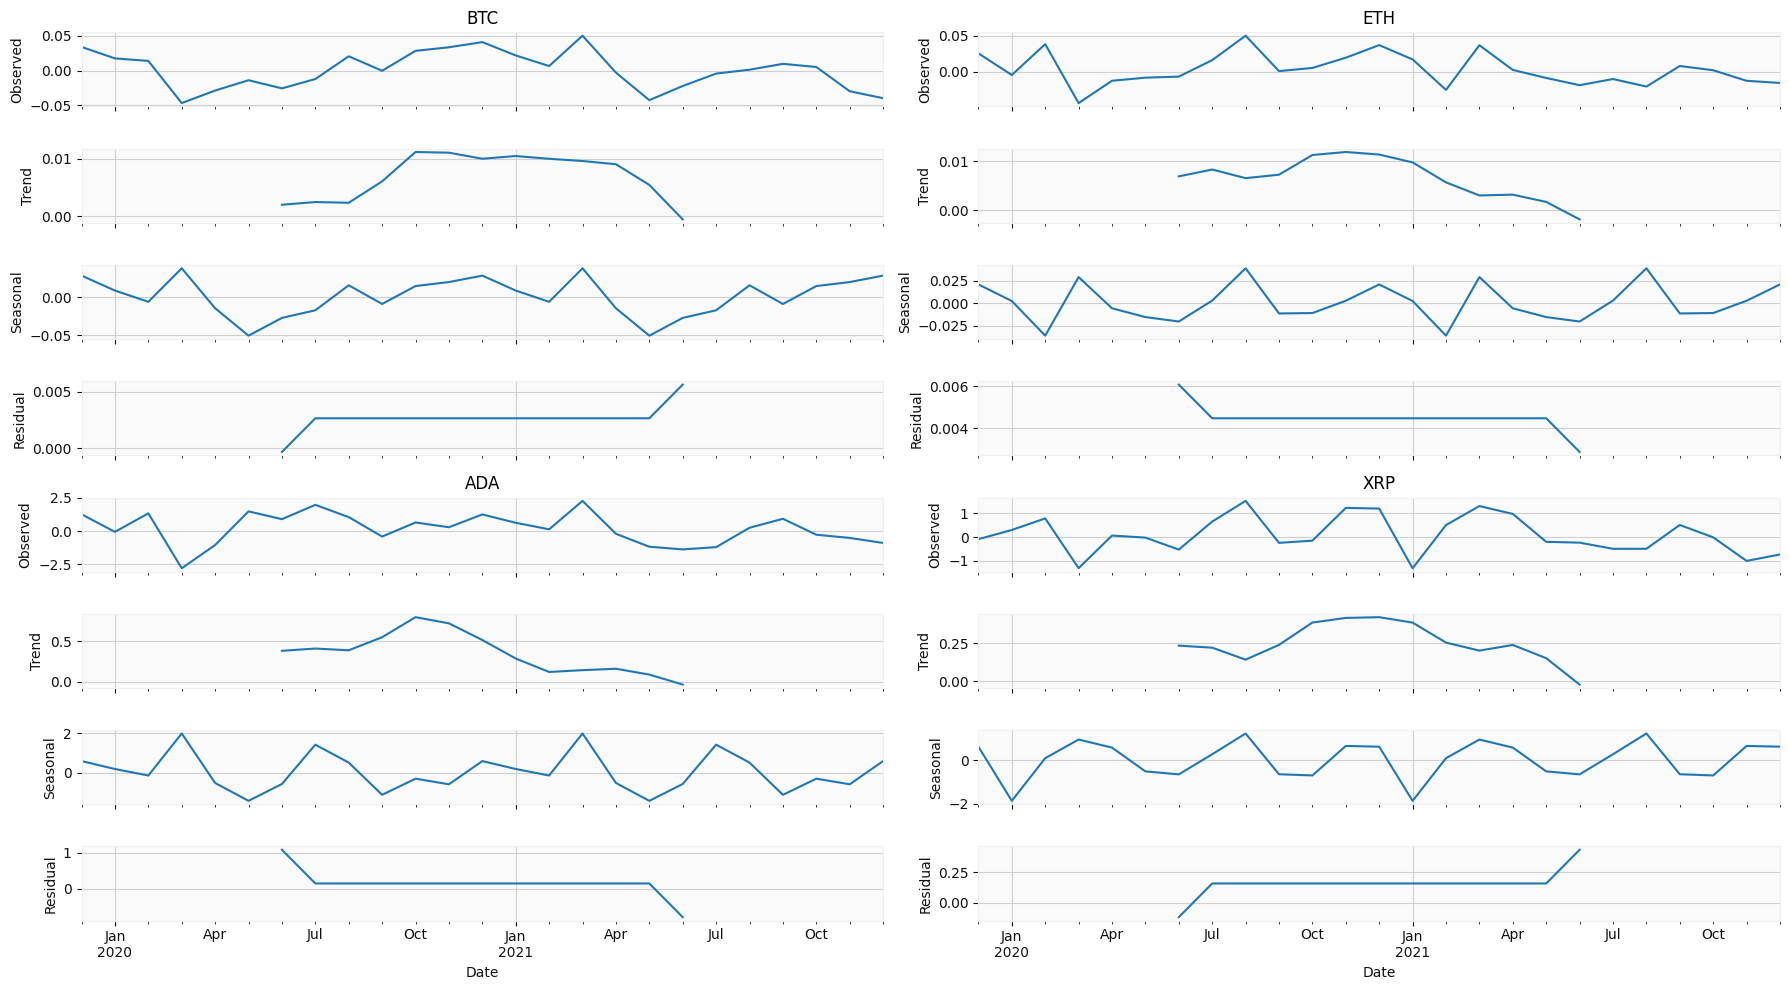

In [595]:
# Second Order differentiation (2 months)

print("Second Order differentiation for 2 month")
for symbol in monthMean:
    monthMean[symbol]['Diff2'] = monthMean[symbol].Diff12 - monthMean[symbol].Diff12.shift(1)
# Seasonal decomposition
fig, axes = plt.subplots(ncols=2, nrows=8, sharex=True, figsize=(18,10))

for i, j, symbol in zip((1,1,2,2), (0,1,0,1), monthMean):
    print(('Dickey–Fuller test for ' + symbol + ': p=%f') % adfuller(monthMean[symbol].Diff2[13:])[1])
    res = seasonal_decompose(monthMean[symbol].Diff2[13:], model='additive')
    plotseasonal(res, axes[(i-1)*4:(i)*4,j], symbol)

plt.tight_layout()
plt.show()

The computed p-value is less than the significance threshold value 0.05, indicating that the series is stationary.

### 5.4 Autocorrelation
After differencing is done to stationarize the time series, next step in fitting an ARIMA model is to determine to see AR or MA terms are required to rectify any residual autocorrection in the differenced series. By looking the auto correction (ACF) function and partial autocorrection (PACF) function plots of differenced series, we can determine the AR and MA componets in residuals [10].

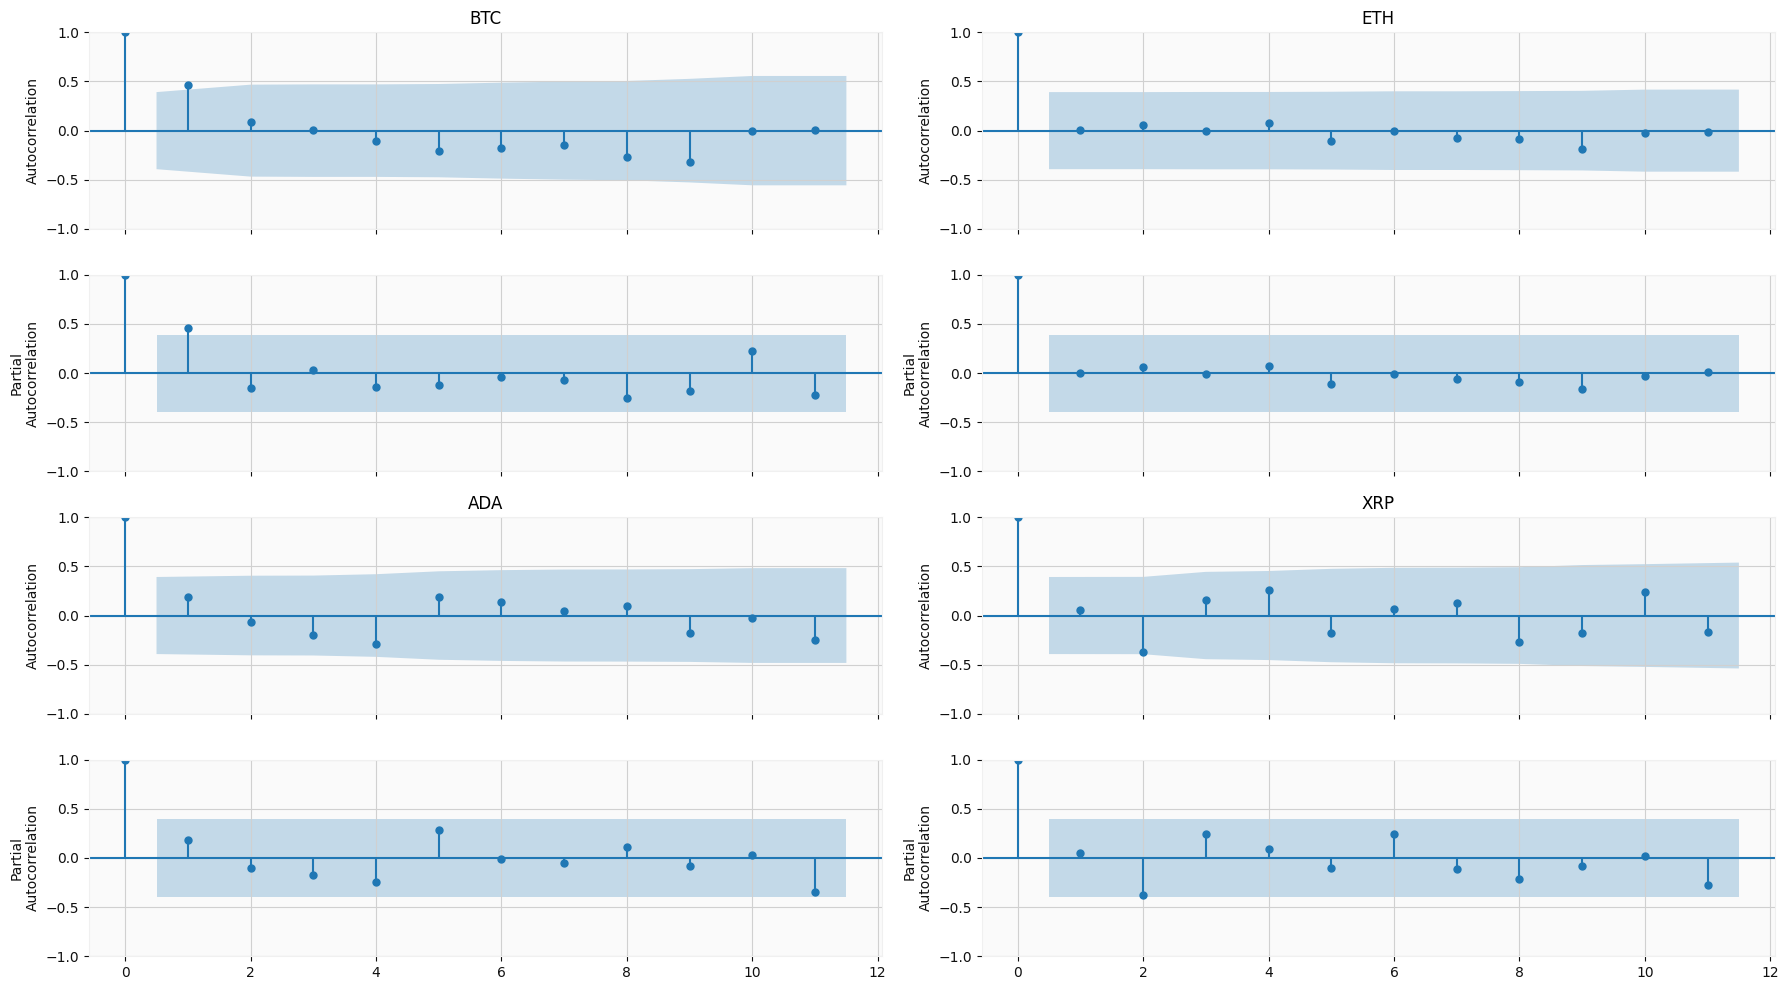

In [596]:
# Function to plot graph
def plotAutoCorrelation(res, axes, coinName):

    plot_acf(res, lags=11, ax=axes[0])
    axes[0].set_ylabel('Autocorrelation')

    plot_pacf(res, lags=11, ax=axes[1], method="ywm")
    axes[1].set_ylabel('Partial\nAutocorrelation')
    axes[1].set_title("")

    axes[0].set_title(coinName)

#autocorrelation plot
fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(18,10))

for i, j, mean in zip((1,1,2,2), (0,1,0,1), monthMean):
    res = monthMean[mean].Diff2[13:].values.squeeze()
    plotAutoCorrelation(res, axes[(i-1)*2:(i)*2,j], mean)

plt.tight_layout()
plt.show()

Almost all spikes are in inside the significant zone (shaded) in the plots, AR and MA models may not be able to extract enough information from residuals.

### 5.5 ARIMA Model: AutoRegressive Integrated Moving Average

ARIMA model are denoted with ARIMA(p, d, q). The p, d and q parameters are for seasonality, trend, and noise in the history data.

- p: the number of lag observations to include in the model, or lag order. (AR)
- d: the number of times that the raw observations are differenced, or the degree of differencing. (I)
- q: the size of the moving average window, also called the order of moving average.(MA)

The (P, D, Q, s) are the seasonal components of model for the AR, MA and periodicity.

We'll use a statsmodels to fit ARIMA model, which will produce an AIC value (Akaike Information Criterion). The AIC is a metric that measures how well a model fits the data and how complicated it is. A model with a large number of features that match the data will have a higher AIC score than one with the same accuracy but fewer features. As a result, we're seeking for a model with a low AIC value.

In [597]:
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

# Intiatializing the parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
paramterList = list(parameters)

results = {}
bestAICs = {}
best_models = {}

# Model selection from different parameters p, d, q and P, D, Q.
for symbol in monthMean:
    result = []
    bestAIC = float('inf')

    for param in paramterList:
        try:
            # I am using 4 month seasonal for ADA because 3 month seasonal is not giving good p values.
            if (symbol == 'ADA'):
                model = SARIMAX(monthMean[symbol]['Box Cox'], order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 8)).fit(disp=-1)
            else:
                model = SARIMAX(monthMean[symbol]['Box Cox'], order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 3)).fit(disp=-1)

        except ValueError:
            print('bad parameter combination for ' + symbol +': ', param)
            continue
        aic = model.aic

        # Sorting best model, paramters and AIC
        if aic < bestAIC:
            best_model = model
            bestAIC = aic
            best_param = param
        result.append([param, model.aic])

    bestAICs[symbol] = bestAIC
    best_models[symbol] = best_model
    results[symbol] = pd.DataFrame(result)

In [598]:
# Best Models summaries
for symbol in results:
    print('\n================================')
    print(symbol + ' summary')
    print('================================')
    result_table = results[symbol]
    result_table.columns = ['parameters', 'aic']
    print(result_table.sort_values(by = 'aic', ascending=True).head())
    print(best_models[symbol].summary())


BTC summary
      parameters         aic
19  (1, 0, 0, 1) -171.833212
7   (0, 1, 0, 1) -170.615363
21  (1, 0, 1, 1) -170.018159
25  (1, 1, 0, 1) -169.975086
23  (1, 0, 2, 1) -169.836236
                                      SARIMAX Results                                      
Dep. Variable:                             Box Cox   No. Observations:                   38
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 3)   Log Likelihood                  88.917
Date:                             Sat, 01 Jan 2022   AIC                           -171.833
Time:                                     10:43:44   BIC                           -167.254
Sample:                                 11-30-2018   HQIC                          -170.272
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975

Dickey–Fuller test for BTC: p=0.000046
Dickey–Fuller test for ETH: p=0.000010
Dickey–Fuller test for ADA: p=0.000004
Dickey–Fuller test for XRP: p=0.000000


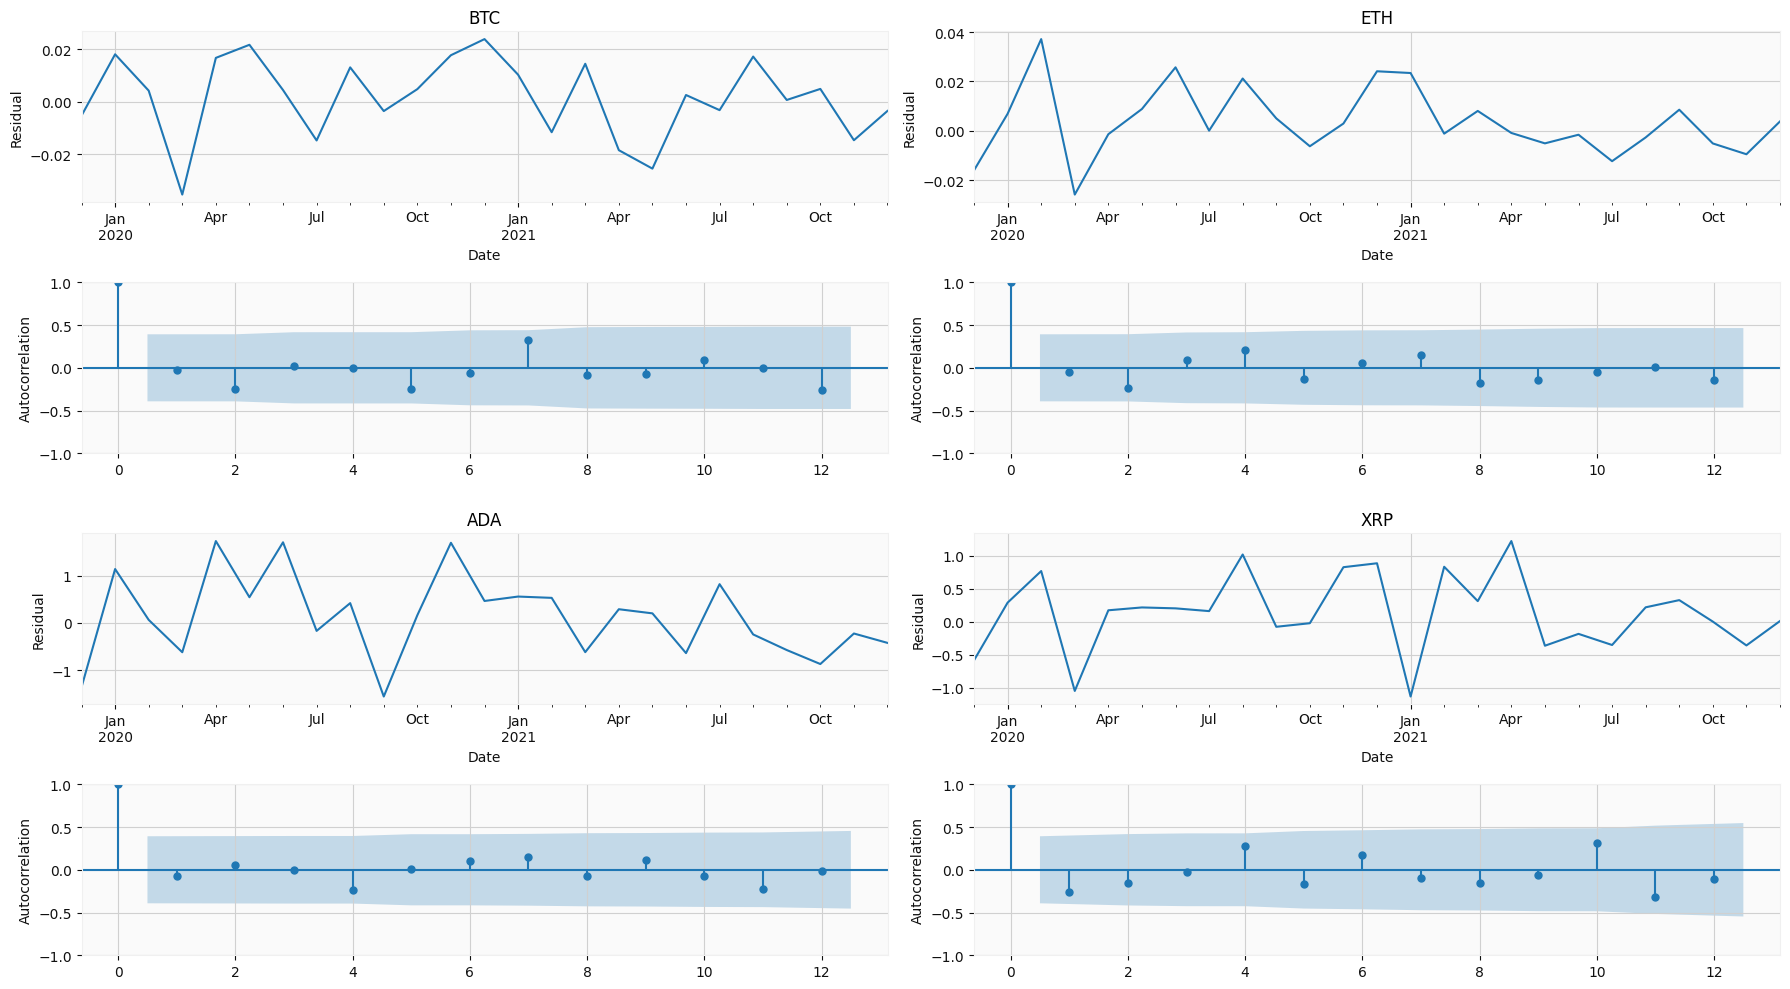

In [599]:
# Plotting Residual and ACF charts for each best selected parameters.
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(18,10))

# Function to plot graph
def plotResidAutoCorrelation(res, axes, coinName):

    res.plot(ax=axes[0])
    axes[0].set_ylabel('Residual')

    axes[1].set_ylabel('Autocorrelation')
    plot_acf(best_models[symbol].resid[13:].values.squeeze(), lags=12, ax=axes[1])
    axes[1].set_title("")

    axes[0].set_title(coinName)

for i, j, symbol in zip((1,1,2,2), (0,1,0,1), best_models):
    print(('Dickey–Fuller test for ' + symbol + ': p=%f') % adfuller(best_models[symbol].resid[13:])[1])
    res = best_models[symbol].resid[13:]
    plotResidAutoCorrelation(res, axes[(i-1)*2:(i)*2,j], symbol)

plt.tight_layout()
plt.show()

### 5.6 Prediction
It is time for 6 month price predictions!!

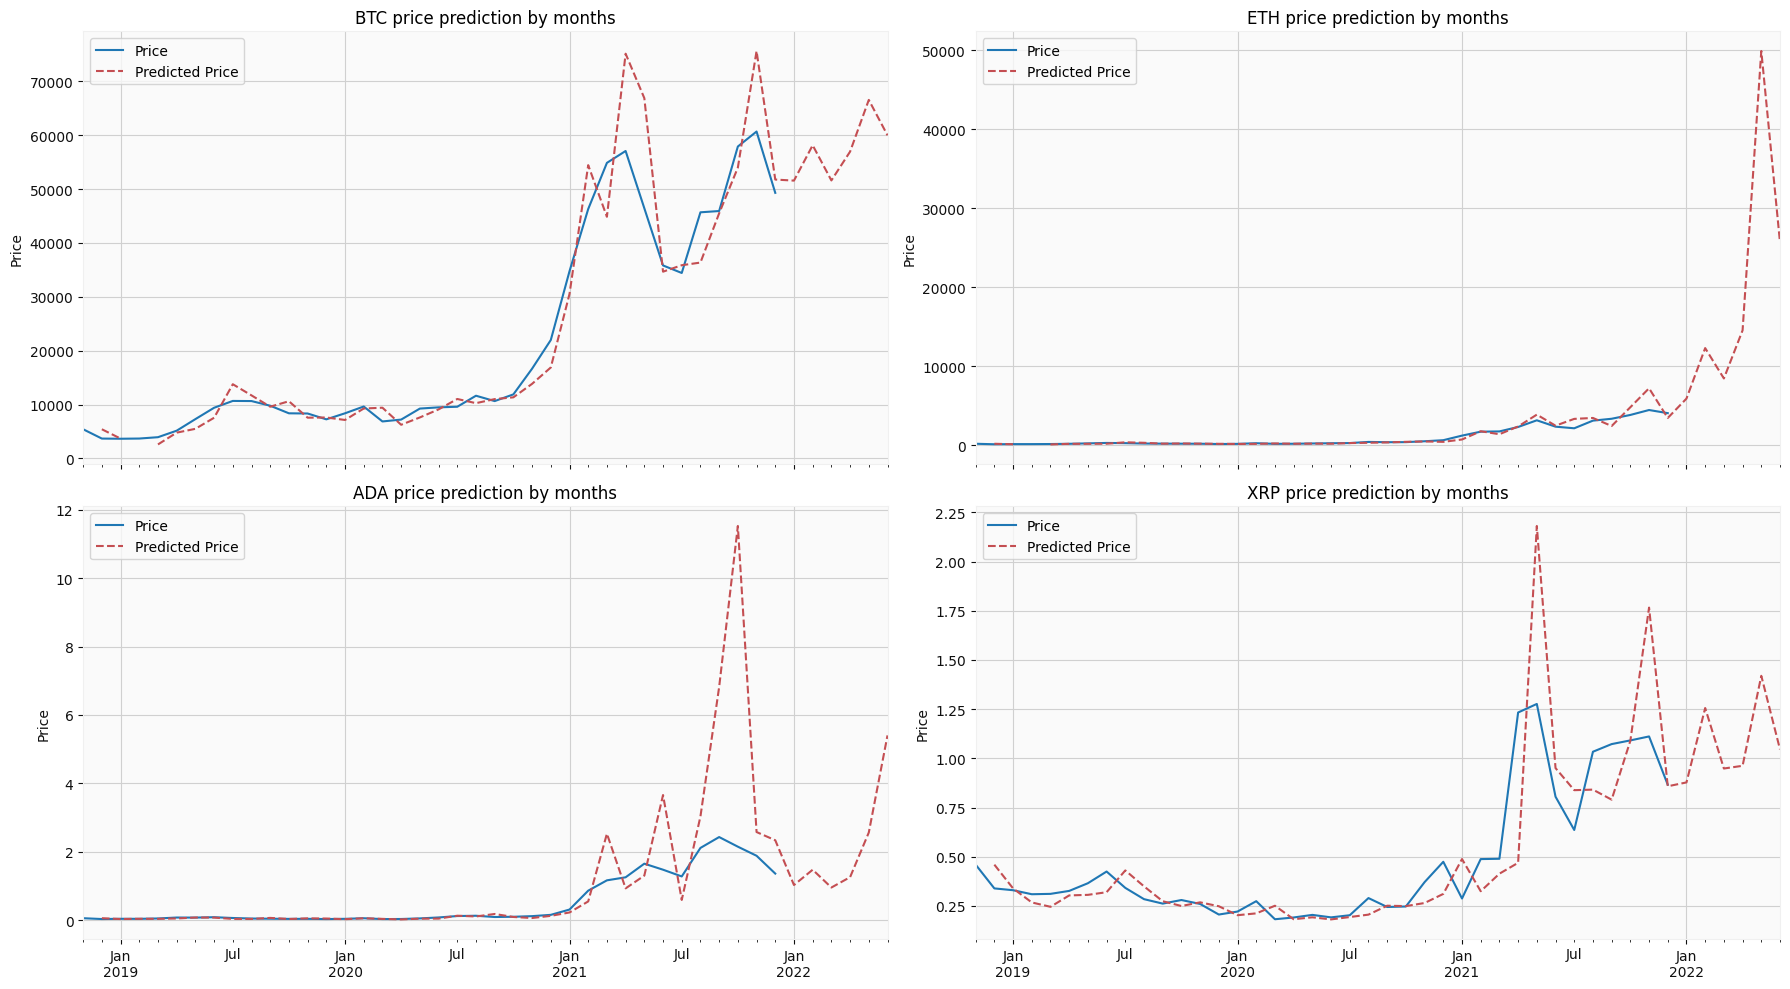

In [600]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(18,10))

# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

# Function to plot graph
def plotPrediction(res, axes, coinName):

    res.Close.plot(ax=axes[0], label='Price')
    res.Prediction.plot(ax=axes[0], color='r', ls='--', label='Predicted Price')

    axes[0].set_ylabel('Price')
    axes[0].set_title(coinName+' price prediction by months')

    axes[0].legend(loc='upper left')

# Prediction of coin prices
DFmonth = monthMean.copy()

for i, j, symbol in zip((1,1,2,2), (0,1,0,1), monthMean):

    DFmonth[symbol]['Close'] = monthMean[symbol][['Close']]

    # Price prediction month list
    date_list = [datetime(2022, 1, 31), datetime(2022, 2, 28), datetime(2022, 3, 31), datetime(2022, 4, 30), datetime(2022, 5, 31), datetime(2022, 6, 30)]

    future = pd.DataFrame(index=date_list, columns= monthMean[symbol].columns)

    DFmonth[symbol] = pd.concat([DFmonth[symbol], future])
    DFmonth[symbol]['Prediction'] = invboxcox(best_models[symbol].predict(start=datetime(2018, 12, 31), end=datetime(2022, 6, 30)), lmbda[symbol])

    res = DFmonth[symbol]
    plotPrediction(res, axes[(i-1):(i),j], symbol)

plt.tight_layout()
plt.show()

The above graphs shows price prediction of next 6 month of the cryptocurrencies. The BTC and XRP result are pretty much acceptable. ETH and ADA given us very bad results this is the cause of their history data price gains. In past few years crypto market was very volatile it attracted lot of investors.

## 6. Summary
### 6.1 Conclusions
From this project's data analysis we discovered that prediction of next 6 month is not good using ARIMA model. We should predict maybe next 1 month price or even half month will likely to be benefit.
To improve the project further, it would be beneficial to
 - Investigate different techniques to standardise the distribution.
 - Using different differencing techniques.
 - Using different cryptocurrencies who has more history data than our requirement and removing start time period which has very high volatility.
 - Using the per minute data instead of per day.
 - Trying some other models like LSTM, Prophet instead of ARIMA

### 6.2 Summary of prepared data
#### 6.2.1 Final cryptocurrencies history month mean plus prediction data

In [601]:
preparedData = {}
for symbol in DFmonth:
    preparedData[symbol] = DFmonth[symbol].reset_index()
    preparedData[symbol].rename({'index': 'Date'}, inplace=True, axis=1,)

# This is example of BTC, preparedDF contains BTC, ETH, ADA and XRP coins data.
preparedData['BTC'].columns

Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Volume $', 'Box Cox',
       'Diff12', 'Diff2', 'Prediction'],
      dtype='object')

In prepared 'preparedData' data contains dataframe for each coin and each dataframe contains following columns.
- Date: Month's end date.
- Close: Mean of closing price of the month.
- Open: Mean of open price of the month.
- High: Mean of high price of the month.
- Low: Mean of low price of the month.
- Volume: Mean of volume quantity of the month.
- Volume $: Mean of volume in US dollar of the month.
- Box Cox: Box Cox transformation.
- Diff12: Seasonal differencing of 12 months.
- Diff2: Regular differencing of 2 months.
- Prediction: Price prediction.

## 7. References and Resources
### 7.1 References
[1]: Mallqui, D., & Fernandes, R. (2019b, February 1). Predicting the direction, maximum, minimum and closing prices of daily Bitcoin exchange rate using machine learning techniques. ScienceDirect. https://www.sciencedirect.com/science/article/pii/S1568494618306707</br>
[2]: Chaudhari, A. (2020, June 11). Forecasting Cryptocurrency Prices using Machine Learning - NORMA@NCI Library. Norma.Ncirl.Ie. http://norma.ncirl.ie/4272/</br>
[3]: Chakrabarti, S. (2021, December 3). Cryptocurrency Price Prediction using ARIMA Model. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/12/cryptocurrency-price-prediction-using-arima-model/</br>

[4]: Use our data. (n.d.). Investing Support. https://www.investing-support.com/hc/en-us/articles/360002357417</br>

[5]: CoinMarketCap. (n.d.-b). Today’s Top 100 Crypto Coins Prices And Data. Retrieved December 26, 2021, from https://coinmarketcap.com/coins/</br>

[6]: Edelweiss. (n.d.). What Is Candle Stick Chart In Stock Market? https://www.edelweiss.in/investology/technical-analysis-2c8d50/what-is-candle-stick-chart-in-stock-market-f4dcde</br>

[7]: Changing image size in Markdown. (2013, February 3). Stack Overflow. https://stackoverflow.com/questions/14675913/changing-image-size-in-markdown</br>

[8]: Hayes, A. (2021, December 9). Simple Moving Average (SMA) Definition. Investopedia. https://www.investopedia.com/terms/s/sma.asp</br>

[9]: Gbadamasi, K. (2019, September 13). Trading with the 20, 50 & 200 Moving Averages - kolatrader. Medium. https://medium.com/@kolatrader/trading-with-the-20-50-200-moving-averages-ead3581bc5d6</br>

[10]: Duke University. (n.d.). Identifying the orders of AR and MA terms in an ARIMA model. Duke University. https://people.duke.edu/%7Ernau/411arim3.htm</br>

[11]: FRANKENFIELD, J. A. K. E. (2021, December 20). Cryptocurrency. Investopedia. https://www.investopedia.com/terms/c/cryptocurrency.asp</br>
[12]: George, D. (2021, December 14). A Brief Introduction to ARIMA and SARIMAX Modeling in Python. Medium. https://medium.com/swlh/a-brief-introduction-to-arima-and-sarima-modeling-in-python-87a58d375def.</br>

[13]: Wikipedia contributors. (2021, October 27). Volume (finance). Wikipedia. https://en.wikipedia.org/wiki/Volume_(finance)</br>

[14]: Edelweiss. (n.d.). What Is Candle Stick Chart In Stock Market? https://www.edelweiss.in/investology/technical-analysis-2c8d50/what-is-candle-stick-chart-in-stock-market-f4dcde


### 7.2 Resources used
#### 7.2.1 Webscraping
- Webscraping lecture and lab, Dr Sean McGrath
- Rai, A. (2021, December 11). Python utility for data scrapping historical financial data- ML Data mining. Medium. https://medium.datadriveninvestor.com/python-utility-for-data-scrapping-historical-financial-data-ml-data-mining-5396dfe6f38c

#### 7.2.1 Data processing, Charts generation
- GeeksforGeeks. (2021, December 16). Plot Candlestick Chart using mplfinance module in Python. https://www.geeksforgeeks.org/plot-candlestick-chart-using-mplfinance-module-in-python/
- Gbadamasi, K. (2019, September 13). Trading with the 20, 50 & 200 Moving Averages - kolatrader. Medium. https://medium.com/@kolatrader/trading-with-the-20-50-200-moving-averages-ead3581bc5d6
- Matplotlib. (n.d.). Pyplot tutorial — Matplotlib 3.5.1 documentation. https://matplotlib.org/stable/tutorials/introductory/pyplot.html

#### 7.2.2 Exploratory data analysis
- DataMites. (2018a, September 27). Time Series Forecasting Theory Part 1 - Datamites Data Science Projects. YouTube. https://www.youtube.com/watch?v=YzMV--KhI2I
- DataMites. (2018b, September 28). ARIMA in Python - Time Series Forecasting Part 2 - Datamites Data Science Projects. YouTube. https://www.youtube.com/watch?v=D9y6dcy0xK8
- Chaudhari, A. (2020, June 11). Forecasting Cryptocurrency Prices using Machine Learning - NORMA@NCI Library. Norma.Ncirl.Ie. http://norma.ncirl.ie/4272/